## Import Libraries

In [2]:
import sys
import os

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)

In [4]:
os.chdir(r'C:\Users\User\Sept')
df = pd.read_excel('CCsentiment.xlsx')

In [5]:
startdate1718 = datetime.strptime('2017-09-01', "%Y-%m-%d").date()
enddate1718 = datetime.strptime('2018-08-31', "%Y-%m-%d").date()

startdate1819 = datetime.strptime('2018-09-01', "%Y-%m-%d").date()
enddate1819 = datetime.strptime('2019-08-31', "%Y-%m-%d").date()

startdate1920 = datetime.strptime('2019-09-01', "%Y-%m-%d").date()
enddate1920 = datetime.strptime('2020-08-31', "%Y-%m-%d").date()

In [6]:
from datetime import datetime

def conv_datetime(date):
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S %A')

In [10]:
df['date']= df['date'].apply(conv_datetime)

In [11]:
df['date']

0       2020-09-27 19:20:48
1       2020-09-27 19:20:48
2       2020-09-27 19:20:48
3       2020-09-27 19:20:48
4       2020-09-27 19:20:48
                ...        
21193   2020-08-08 19:29:17
21194   2020-06-13 19:35:36
21195   2019-06-20 16:04:03
21196   2019-10-16 19:58:22
21197   2017-11-05 18:15:03
Name: date, Length: 21198, dtype: datetime64[ns]

In [12]:
df['date'] = df['date'].dt.date

In [13]:
type(df['date'][0])

datetime.date

In [14]:
#greater than the start date and smaller than the end date
mask1718 = (df['date'] > startdate1718) & (df['date'] <= enddate1718)
mask1819 = (df['date'] > startdate1819) & (df['date'] <= enddate1819)
mask1920 = (df['date'] > startdate1920) & (df['date'] <= enddate1920)

In [15]:
df1718 = df.loc[mask1718]
print(len(df1718))
df1819 = df.loc[mask1819]
print(len(df1819))
df1920 = df.loc[mask1920]
print(len(df1920))

3079
2989
13118


#### GRV SDR

In [16]:
SDRcomments = df.loc[df['family_type']=='SDR']

In [17]:
len(SDRcomments)

1950

In [18]:
selection = [''
            ]

In [19]:
selection1 = [x.lower() for x in selection]

In [20]:
SDRcomments = SDRcomments[SDRcomments.comments_tr.str.contains('|'.join(selection1))]

In [21]:
len(SDRcomments)

57

In [22]:
SDRcomments1718=SDRcomments.loc[mask1718]
print(len(SDRcomments1718))
SDRcomments1819=SDRcomments.loc[mask1819]
print(len(SDRcomments1819))
SDRcomments1920=SDRcomments.loc[mask1920]
print(len(SDRcomments1920))

8
7
34


In [23]:
os.chdir(r'C:\Users\User\Sept\dfwithcomments\GRV')
SDRcomments1718
df2 = SDRcomments1718.comments_tr.str.split(expand=True).stack()
df2 = df2[df2.isin(selection1)].value_counts()
SDRsub1718 = pd.DataFrame(df2)
SDRsub1718['SDR_Num_Comments']=SDRsub1718[0]
del SDRsub1718[0]
SDRsub1718.to_csv('SDRsub1718.csv')

SDRcomments1819
df2 = SDRcomments1819.comments_tr.str.split(expand=True).stack()
df2 = df2[df2.isin(selection1)].value_counts()
SDRsub1819 = pd.DataFrame(df2)
SDRsub1819['SDR_Num_Comments']=SDRsub1819[0]
del SDRsub1819[0]
SDRsub1819.to_csv('SDRsub1819.csv')

SDRcomments1920
df2 = SDRcomments1920.comments_tr.str.split(expand=True).stack()
df2 = df2[df2.isin(selection1)].value_counts()
SDRsub1920 = pd.DataFrame(df2)
SDRsub1920['SDR_Num_Comments']=SDRsub1920[0]
del SDRsub1920[0]
SDRsub1920.to_csv('SDRsub1920.csv')

In [24]:
SDRsub1718

,Sender_Num_Comments
strive,5
torque,2
spectral,1


In [25]:
SDRsub1819

,Sender_Num_Comments
torque,4
spectral,1
stitched,1
grail,1


In [26]:
SDRsub1920

,Sender_Num_Comments
torque,11
aeroad,5
strive,4
spectral,4
neuron,2
lux,1
roadlite,1
stitched,1
grail,1


In [27]:
os.chdir(r'C:\Users\User\Sept\dfwithcomments\GRV')
SDRsub1718 = pd.read_csv('SDRsub1718.csv')
SDRsub1819 = pd.read_csv('SDRsub1819.csv')
SDRsub1920 = pd.read_csv('SDRsub1920.csv')

In [28]:
SDRsub= pd.concat([SDRsub1718,SDRsub1819,SDRsub1920],axis=1)
SDRsub.columns = ['Subs_1718', 'Count_1718','Subs_1819','Count_1819', 'Subs_1920', 'Count_1920']
#SDRsub.dropna(inplace=True)
SDRsub

,Subs_1718,Count_1718,Subs_1819,Count_1819,Subs_1920,Count_1920
0,strive,5.0,torque,4.0,torque,11
1,torque,2.0,spectral,1.0,aeroad,5
2,spectral,1.0,stitched,1.0,strive,4
3,NaN,NaN,grail,1.0,spectral,4
4,NaN,NaN,NaN,NaN,neuron,2
5,NaN,NaN,NaN,NaN,lux,1
6,NaN,NaN,NaN,NaN,roadlite,1
7,NaN,NaN,NaN,NaN,stitched,1
8,NaN,NaN,NaN,NaN,grail,1


In [29]:
SDRsub1720 = (pd.wide_to_long(SDRsub.reset_index(),
                    i='index', 
                    stubnames=['Subs','Count'], 
                    sep='_', 
                    j='d').groupby('Subs')['Count'].sum().rename_axis('Subs_1720')
                    .reset_index(name='Count_1720'))
SDRsub1720 = SDRsub1720.sort_values('Count_1720',ascending=False)
SDRsub1720

,Subs_1720,Count_1720
8,torque,17.0
7,strive,9.0
5,spectral,6.0
0,aeroad,5.0
1,grail,2.0
3,neuron,2.0
6,stitched,2.0
2,lux,1.0
4,roadlite,1.0


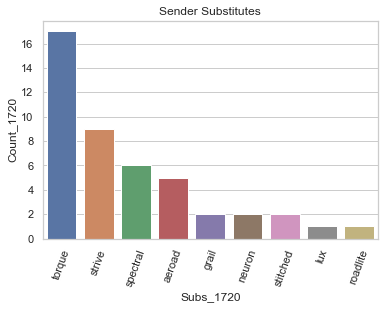

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Subs_1720", y="Count_1720", data=SDRsub1720).set_title('SDR Substitutes')
plt.xticks(rotation=70)
plt.savefig('SDR Substitutes.png')